# IME672 PROJECT: CREDIT CARD FRAUD DETECTION


**Group 12:**

170368 MAHAJAN DIPAK ANIL 

170384 MAYUR KUMAR

170405 MUKESH KUMAR

170429 NEIL RAJIV SHIRUDE

170440 NIMISH AGARWAL



**Data Preproessing:**

**Data Visualization, extreme outliers,** 

**correlation analysis, robust scaling, stratified sampling,**

**dimensionality and numerosity reduction** 



In [1]:
#Libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec # to do the grid of plots

In [2]:
# reading data from csv file
df = pd.read_csv('creditcard.csv')

In [3]:
df.shape

(284807, 31)

In [4]:
df = df[df.Amount < 10000]

In [5]:
# Reason: robust scaler is immune to outliers, as median is chosen as the central tendancy.
from sklearn.preprocessing import StandardScaler, RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df = df[['scaled_time','scaled_amount', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Class']]
print('Scaled Data\n')
df.head(10)

Scaled Data



,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994989,1.783399,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994989,-0.269843,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994978,4.984069,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994978,1.418390,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994966,0.670626,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
5,-0.994966,-0.256149,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0
6,-0.994942,-0.237703,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0
7,-0.994907,0.262717,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0
8,-0.994907,0.994969,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0
9,-0.994884,-0.256009,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    # print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

print("df shape", df.shape)
print("original_Xtrain shape", original_Xtrain.shape)
print("original_ytrain shape", original_ytrain.shape)
print("original_Xtest shape", original_Xtest.shape)
print("original_ytest shape", original_ytest.shape)

df shape (284799, 31)
original_Xtrain shape (227840, 30)
original_ytrain shape (227840,)
original_Xtest shape (56959, 30)
original_ytest shape (56959,)


In [7]:
# Make Dataset

credit_card_4_5 = pd.concat([pd.DataFrame(original_Xtrain), pd.DataFrame(original_ytrain)], axis=1)
credit_card_1_5 = pd.concat([pd.DataFrame(original_Xtest), pd.DataFrame(original_ytest)], axis=1)


In [8]:
credit_card_1_5.to_csv("credit_card_1_5.csv")
credit_card_4_5.to_csv("credit_card_4_5.csv")

In [9]:
print("credit_card_4_5 -> ", credit_card_4_5.shape)
print("credit_card_1_5 -> ", credit_card_1_5.shape)


credit_card_4_5 ->  (227840, 31)
credit_card_1_5 ->  (56959, 31)


In [10]:
df = credit_card_4_5

In [11]:
nonfraud = df[df.Class == 0]
fraud = df[df.Class == 1]

In [12]:
print(fraud.shape)
print(nonfraud.shape)

(394, 31)
(227446, 31)


In [13]:
print('-'*100)
print('-'*100)

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


We have trained and tested 5 models:
1. Isolation Forest
2. Gaussian Anomaly Detection
3. Logistic Regression
4. Support Vector Classifier
5. K-Nearest Neighors Classifier

All our models were finally tested on a set of around **57,000 transactions**, which had proportional **98 fraud transactions**, which is roughly equivalent to **10 hours worth credit card transactions**.

When we trained and tested our models, there were various interesting observations. 

There was always a **trade-off** between the **number of fraud transactions that were missed** and the **number of non-fraud transactions that were branded as fraudulent.** 

**Practically, for the European Bank** this tradeoff can be modeled as a tradeoff between **missed fraud transactions** and **work-force required**.


# ISOLATION FOREST

**An Anomaly Detection Algorithm**

**Motivaton:** Outliers are less frequent than regular observations and they lie further away from the regular observations.

**Strategy:** 

The algorithm tries to isolates every data tuple from its neighbours.

The data tuples which require relatively less number of steps for isolation are regarded as outliers. 

This is done by dividing the data into smaller samples and then building small decision trees for finding the path length for isolation. 


In [14]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [15]:
X_test = credit_card_1_5.drop('Class',axis=1)
y_test = credit_card_1_5['Class']

D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[[39185 17676]
 [    9    89]]
0.6895135097175161
              precision    recall  f1-score   support

           0       1.00      0.69      0.82     56861
           1       0.01      0.91      0.01        98

   micro avg       0.69      0.69      0.69     56959
   macro avg       0.50      0.80      0.41     56959
weighted avg       1.00      0.69      0.81     56959

Total number of Transactions classified as Fraudulent:  17765
Number of Fraudulent Transactions classified as Non-fraudulent:  9 out of 98


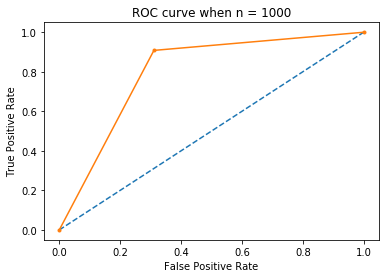

In [16]:
nonfraud_sample = nonfraud.sample(n=1000)
df_outlier=pd.concat([fraud,nonfraud_sample])
X_train = df_outlier.drop('Class', axis=1)
y_train = df_outlier['Class']

state = 1
outlier_fraction = len(fraud)/float(len(nonfraud_sample))

clf = IsolationForest(max_samples=len(X_train), contamination = outlier_fraction, random_state = state)
clf.fit(X_train)
y_pred = clf.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred = pd.DataFrame(y_pred)

mat = confusion_matrix(y_test,y_pred)
print(mat)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Total number of Transactions classified as Fraudulent: ", mat[1][1]+mat[0][1])
print("Number of Fraudulent Transactions classified as Non-fraudulent: ", mat[1][0], "out of 98")

from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve when n = 1000')
# show the plot
pyplot.show()

D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[[56610   251]
 [   70    28]]
0.9943643673519549
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.10      0.29      0.15        98

   micro avg       0.99      0.99      0.99     56959
   macro avg       0.55      0.64      0.57     56959
weighted avg       1.00      0.99      1.00     56959

Total number of Transactions classified as Fraudulent:  279
Number of Fraudulent Transactions classified as Non-fraudulent:  70 out of 98


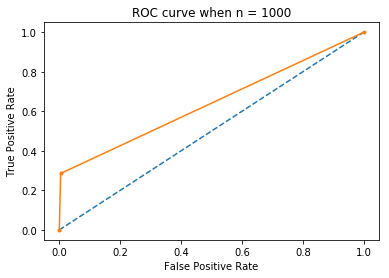

In [17]:
nonfraud_sample = nonfraud.sample(n=45000)
df_outlier=pd.concat([fraud,nonfraud_sample])
X_train = df_outlier.drop('Class', axis=1)
y_train = df_outlier['Class']

state = 1
outlier_fraction = len(fraud)/float(len(nonfraud_sample))

clf = IsolationForest(max_samples=len(X_train), contamination = outlier_fraction, random_state = state)
clf.fit(X_train)
y_pred = clf.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred = pd.DataFrame(y_pred)

mat = confusion_matrix(y_test,y_pred)
print(mat)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Total number of Transactions classified as Fraudulent: ", mat[1][1]+mat[0][1])
print("Number of Fraudulent Transactions classified as Non-fraudulent: ", mat[1][0], "out of 98")

from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve when n = 1000')
# show the plot
pyplot.show()

D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


[[55301  1560]
 [   29    69]]
Accuracy for Isolation Forest:  97.21027405677768
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56861
           1       0.04      0.70      0.08        98

   micro avg       0.97      0.97      0.97     56959
   macro avg       0.52      0.84      0.53     56959
weighted avg       1.00      0.97      0.98     56959

Total number of Transactions classified as Fraudulent:  1629
Number of Fraudulent Transactions classified as Non-fraudulent:  29 out of 98


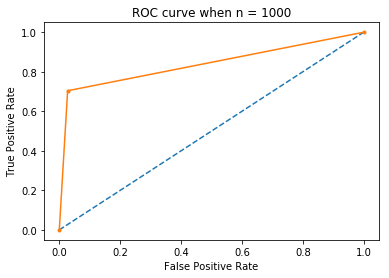

In [55]:
nonfraud_sample = nonfraud.sample(n=5000)
df_outlier=pd.concat([fraud,nonfraud_sample])
X_train = df_outlier.drop('Class', axis=1)
y_train = df_outlier['Class']

state = 1
outlier_fraction = len(fraud)/float(len(nonfraud_sample))

clf = IsolationForest(max_samples=len(X_train), contamination = outlier_fraction, random_state = state)
clf.fit(X_train)
y_pred = clf.predict(X_test)
y_pred[y_pred == 1] = 0
y_pred[y_pred == -1] = 1
y_pred = pd.DataFrame(y_pred)

mat = confusion_matrix(y_test,y_pred)
print(mat)
print("Accuracy for Isolation Forest: ", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test,y_pred))
print("Total number of Transactions classified as Fraudulent: ", mat[1][1]+mat[0][1])
print("Number of Fraudulent Transactions classified as Non-fraudulent: ", mat[1][0], "out of 98")


from sklearn.metrics import roc_curve
from matplotlib import pyplot
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.title('ROC curve when n = 1000')
# show the plot
pyplot.show()


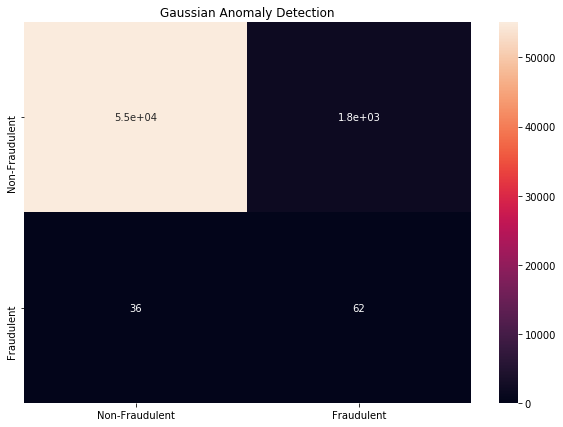

In [51]:
import seaborn as sn
df_cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index = [i for i in ['Non-Fraudulent','Fraudulent']],
                  columns = [i for i in ['Non-Fraudulent','Fraudulent']])
plt.figure(figsize = (10,7))
plt.title("Gaussian Anomaly Detection")
sn.heatmap(df_cm, annot=True)


In [19]:
y_pred_iso = y_pred

# GAUSSIAN ANOMALY DETECTION


The **intuition** behind applying this technique in our case;-


It is **preferred over Supervised Learning Algorithms** when there are very small positive examples (y=1) compared to large negative examples (y=0) which makes it **ideal** for our case due to **high-class imbalance nature** of our Dataset.

Since credit card fraud in the future may be completely different, it gives us the **liberty of classifying different types of anomalies**. In contrast to other classification algorithms which demand future examples similar to training ones.

The features provided to us are already gone through **PCA meaning independent** of each other thus satisfying the prerequisite of this technique.

In [50]:
from scipy.stats import multivariate_normal

def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma

def multivariateGaussian(dataset, mu, sigma):
    p = multivariate_normal(mean = mu, cov = sigma)
    return p.pdf(dataset)


In [21]:
# Epsilon value is the threshold value,
# below which we will mark transaction as Anomalous.

def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    farray = []
    Recallarray = []
    Precisionarray = []
    epsilons = (0.0000e+00, 1.0527717316e-70, 1.0527717316e-50, 1.0527717316e-24)
    for epsilon in epsilons:
        predictions = (p_cv < epsilon)
        f = f1_score(train_cv_y, predictions, average = "binary")
        Recall = recall_score(train_cv_y, predictions, average = "binary")
        Precision = precision_score(train_cv_y, predictions, average = "binary")
        farray.append(f)
        Recallarray.append(Recall)
        Precisionarray.append(Precision)
        print ('For below Epsilon')
        print(epsilon)
        print ('F1 score , Recall and Precision are as below')
        print ('Best F1 Score %f' %f)
        print ('Best Recall Score %f' %Recall)
        print ('Best Precision Score %f' %Precision)
        print ('-'*40)
        if f > best_f1:
            best_f1 = f
            best_recall = Recall
            best_precision = Precision
            best_epsilon = epsilon    
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.7, 0.3])
    #plt.subplot(3,1,1)
    plt.plot(farray ,"ro")
    plt.plot(farray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('F1 score vs Epsilon value')
    ax.annotate('Best F1 Score', xy=(best_epsilon,best_f1), xytext=(best_epsilon,best_f1))
    plt.xlabel("Epsilon value") 
    plt.ylabel("F1 Score") 
    plt.show()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.9, 0.3])
    #plt.subplot(3,1,2)
    plt.plot(Recallarray ,"ro")
    plt.plot(Recallarray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('Recall vs Epsilon value')
    ax.annotate('Best Recall Score', xy=(best_epsilon,best_recall), xytext=(best_epsilon,best_recall))
    plt.xlabel("Epsilon value") 
    plt.ylabel("Recall Score") 
    plt.show()
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.5, 0.9, 0.3])
    #plt.subplot(3,1,3)
    plt.plot(Precisionarray ,"ro")
    plt.plot(Precisionarray)
    ax.set_xticks(range(5))
    ax.set_xticklabels(epsilons,rotation = 60 ,fontsize = 'medium' )
    ax.set_ylim((0,1.0))
    ax.set_title('Precision vs Epsilon value')
    ax.annotate('Best Precision Score', xy=(best_epsilon,best_precision), xytext=(best_epsilon,best_precision))
    plt.xlabel("Epsilon value") 
    plt.ylabel("Precision Score") 
    plt.show()
    return best_f1, best_epsilon

In [22]:
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994989,1.783399,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994989,-0.269843,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994978,4.984069,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994978,1.418390,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994966,0.670626,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Feature Importance
# To ease the Problem at hand, we use Feature importance to get rid 
# of unwanted features whose existance will not improve our prediction model. 

# For that, I have used random forest classifier to identify the influential fetures. 

rnd_clf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rnd_clf.fit(df.iloc[:,2:29],df.iloc[:,30]);


In [25]:
# Visualizing feature importance
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

x, y = (list(x) for x in zip(*sorted(zip(rnd_clf.feature_importances_, df.iloc[:,2:29].columns), 
                                     reverse = False)))
trace2 = go.Bar(
    x = x ,
    y = y,
    marker = dict(color=x, colorscale = 'Viridis', reversescale = True),
    name = 'Random Forest Feature importance',
    orientation = 'h',
)

layout = dict(
    title='Barplot of Feature importances',
    width = 600, height = 1000,
    yaxis=dict( showgrid=False, showline=False, showticklabels=True),
    margin=dict(l=300),
)

fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)

ModuleNotFoundError: No module named 'plotly'

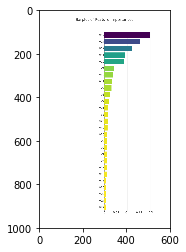

In [27]:
im = plt.imread('feature_importance.png')
# show the image
plt.imshow(im)
plt.show()

In [28]:
print("Relatively More Important Features")
for name, importance in zip(df.iloc[:,2:29].columns, rnd_clf.feature_importances_):
    if importance > 0.015 :
        print('"' + name + '"'+',')

Relatively More Important Features
"V3",
"V4",
"V7",
"V9",
"V10",
"V11",
"V12",
"V14",
"V16",
"V17",
"V18",


In [29]:
# Dropping less important features
drop_features = ['V1','V2','V5','V6','V8','V13','V15','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']
df.drop(drop_features, axis =1, inplace = True)


In [30]:
df.shape

(227840, 14)

In [31]:
train_strip_v1 = df[df["Class"] == 1]
train_strip_v0 = df[df["Class"] == 0]

In [32]:
Normal_len = len (train_strip_v0)
Anomolous_len = len (train_strip_v1)

start_mid = Anomolous_len // 2
start_midway = start_mid + 1

train_cv_v1  = train_strip_v1 [: start_mid]
train_test_v1 = train_strip_v1 [start_midway:Anomolous_len]

start_mid = (Normal_len * 60) // 100
start_midway = start_mid + 1

cv_mid = (Normal_len * 80) // 100
cv_midway = cv_mid + 1

train_fraud = train_strip_v0 [:start_mid]
train_cv    = train_strip_v0 [start_midway:cv_mid]
train_test  = train_strip_v0 [cv_midway:Normal_len]

train_cv = pd.concat([train_cv,train_cv_v1],axis=0)
train_test = pd.concat([train_test,train_test_v1],axis=0)

train_cv_y = train_cv["Class"]
train_test_y = train_test["Class"]

train_cv.drop(labels = ["Class"], axis = 1, inplace = True)
train_fraud.drop(labels = ["Class"], axis = 1, inplace = True)
train_test.drop(labels = ["Class"], axis = 1, inplace = True)

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [33]:
# Finding Probabilities

mu, sigma = estimateGaussian(train_fraud)
p = multivariateGaussian(train_fraud,mu,sigma)
p_cv = multivariateGaussian(train_cv,mu,sigma)
p_test = multivariateGaussian(train_test,mu,sigma)

For below Epsilon
0.0
F1 score , Recall and Precision are as below
Best F1 Score 0.000000
Best Recall Score 0.000000
Best Precision Score 0.000000
----------------------------------------
For below Epsilon
1.0527717316e-70
F1 score , Recall and Precision are as below
Best F1 Score 0.788462
Best Recall Score 0.832487
Best Precision Score 0.748858
----------------------------------------
For below Epsilon
1.0527717316e-50
F1 score , Recall and Precision are as below
Best F1 Score 0.696538
Best Recall Score 0.868020
Best Precision Score 0.581633
----------------------------------------
For below Epsilon
1.0527717316e-24
F1 score , Recall and Precision are as below
Best F1 Score 0.375000
Best Recall Score 0.883249
Best Precision Score 0.238030
----------------------------------------


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


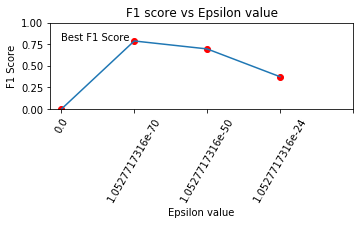

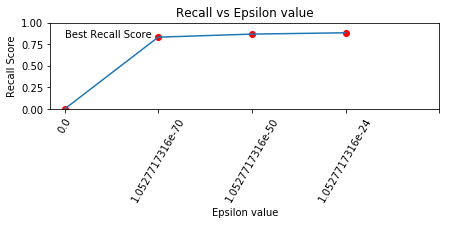

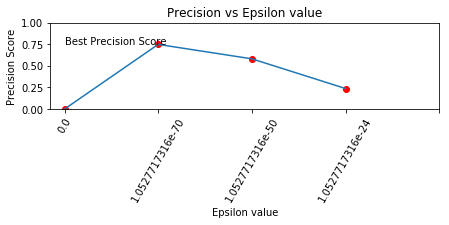

In [34]:
# Performance wrt to Epsilon values
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve

fscore, ep= selectThresholdByCV(p_cv,train_cv_y)

In [35]:

print("PREDICTIONS ON CROSS-VALIDATION SET\n")
predictions = (p_cv < ep)
Recall = recall_score(train_cv_y, predictions, average = "binary")    
Precision = precision_score(train_cv_y, predictions, average = "binary")
F1score = f1_score(train_cv_y, predictions, average = "binary")    
print ('F1 score , Recall and Precision for Cross Validation dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

PREDICTIONS ON CROSS-VALIDATION SET

F1 score , Recall and Precision for Cross Validation dataset
Best F1 Score 0.788462
Best Recall Score 0.832487
Best Precision Score 0.748858


In [36]:
print("PREDICTIONS ON TEST SET\n")
predictions = (p_test < ep)
Recall = recall_score(train_test_y, predictions, average = "binary")    
Precision = precision_score(train_test_y, predictions, average = "binary")
F1score = f1_score(train_test_y, predictions, average = "binary")    
print ('F1 score , Recall and Precision for Test dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

PREDICTIONS ON TEST SET

F1 score , Recall and Precision for Test dataset
Best F1 Score 0.723514
Best Recall Score 0.714286
Best Precision Score 0.732984


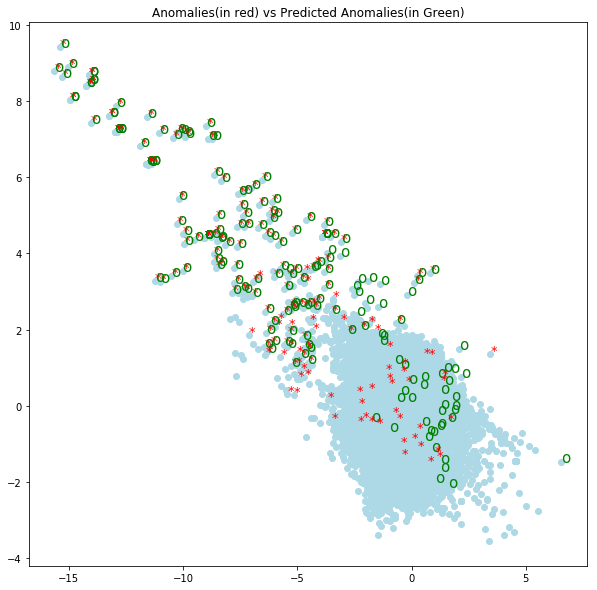

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(train_test['V14'],train_test['V11'],marker="o", color="lightBlue")
ax.set_title('Anomalies(in red) vs Predicted Anomalies(in Green)')
for i, txt in enumerate(train_test['V14'].index):
       if train_test_y.loc[txt] == 1 :
            ax.annotate('*', (train_test['V14'].loc[txt],train_test['V11'].loc[txt]),fontsize=13,color='Red')
       if predictions[i] == True :
            ax.annotate('o', (train_test['V14'].loc[txt],train_test['V11'].loc[txt]),fontsize=15,color='Green')

In [38]:
test_df = credit_card_1_5

In [39]:
credit_card_1_5.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
212516,0.636802,-0.307295,-1.298443,1.948100,-4.509947,1.305805,-0.019486,-0.509238,-2.643398,1.283545,...,0.250415,1.178032,1.360989,-0.272013,-0.325948,0.290703,0.841295,0.643094,0.201156,1
212644,0.637366,9.864589,-2.356348,1.746360,-6.374624,1.772205,-3.439294,1.457811,-0.362577,1.443791,...,0.194810,0.857942,0.621203,0.964817,-0.619437,-1.732613,0.108361,1.130828,0.415703,1
213092,0.639304,0.006568,-4.666500,-3.952320,0.206094,5.153525,5.229469,0.939040,-0.635033,-0.704506,...,-2.286137,-0.664263,1.821422,0.113563,-0.759673,-0.502304,0.630639,-0.513880,0.729526,1
213116,0.639422,-0.191448,-3.975939,-1.244939,-3.707414,4.544772,4.050676,-3.407679,-5.063118,1.007042,...,2.109403,1.059737,-0.037395,0.348707,-0.162929,0.410531,-0.123612,0.877424,0.667568,1
214662,0.647058,1.377026,0.467992,1.100118,-5.607145,2.204714,-0.578539,-0.174200,-3.454201,1.102823,...,0.589575,0.983481,0.899876,-0.285103,-1.929717,0.319869,0.170636,0.851798,0.372098,1


In [40]:
# Dropping less important features
drop_features = ['V1','V2','V5','V6','V8','V13','V15','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']
test_df.drop(drop_features, axis =1, inplace = True)

In [41]:
test_y = test_df['Class']

In [42]:
test_df.drop(labels = ["Class"], axis = 1, inplace = True)

In [43]:
p_test_df = multivariateGaussian(test_df,mu,sigma)

In [44]:
print("PREDICTIONS ON ORIGINAL TEST SET\n")
predictions = (p_test_df < ep)
Recall = recall_score(test_y, predictions, average = "binary")    
Precision = precision_score(test_y, predictions, average = "binary")
F1score = f1_score(test_y, predictions, average = "binary")    
print ('F1 score , Recall and Precision for Test dataset')
print ('Best F1 Score %f' %F1score)
print ('Best Recall Score %f' %Recall)
print ('Best Precision Score %f' %Precision)

PREDICTIONS ON ORIGINAL TEST SET

F1 score , Recall and Precision for Test dataset
Best F1 Score 0.596330
Best Recall Score 0.663265
Best Precision Score 0.541667


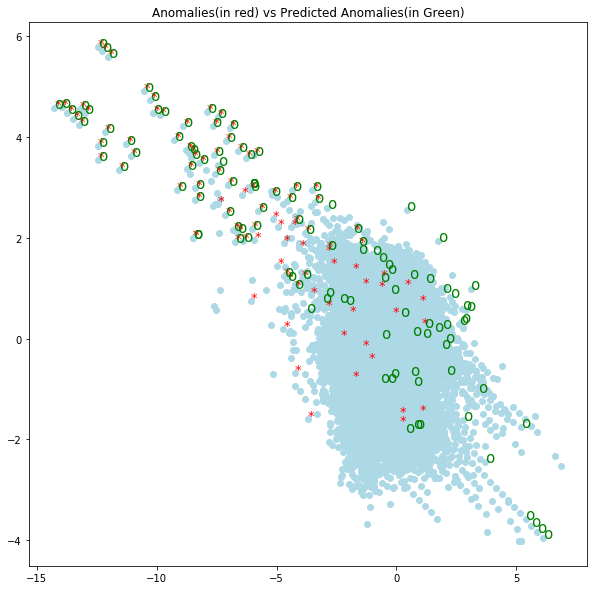

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(test_df['V14'],test_df['V11'],marker="o", color="lightBlue")
ax.set_title('Anomalies(in red) vs Predicted Anomalies(in Green)')
for i, txt in enumerate(test_df['V14'].index):
       if test_y.loc[txt] == 1 :
            ax.annotate('*', (test_df['V14'].loc[txt],test_df['V11'].loc[txt]),fontsize=13,color='Red')
       if predictions[i] == True :
            ax.annotate('o', (test_df['V14'].loc[txt],test_df['V11'].loc[txt]),fontsize=15,color='Green')

[[56806    55]
 [   33    65]]
Accuracy for Gaussian Anomaly Detection:  99.84550290559876
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.54      0.66      0.60        98

   micro avg       1.00      1.00      1.00     56959
   macro avg       0.77      0.83      0.80     56959
weighted avg       1.00      1.00      1.00     56959

Total number of Transactions classified as Fraudulent:  120
Number of Fraudulent Transactions classified as Non-fraudulent:  33 out of 98


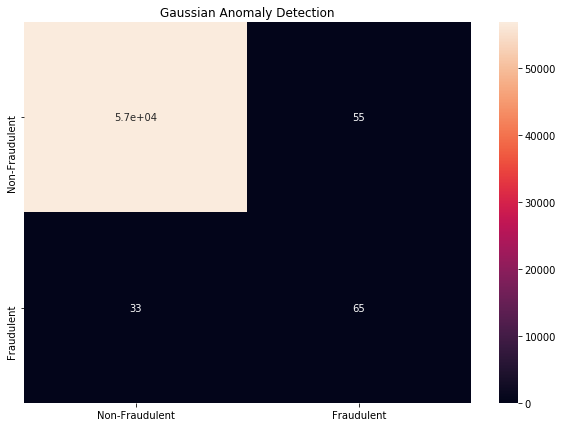

In [53]:
import seaborn as sn
mat = confusion_matrix(test_y,predictions)
print(mat)
print("Accuracy for Gaussian Anomaly Detection: ", accuracy_score(test_y,predictions)*100)
print(classification_report(test_y,predictions))
print("Total number of Transactions classified as Fraudulent: ", mat[1][1]+mat[0][1])
print("Number of Fraudulent Transactions classified as Non-fraudulent: ", mat[1][0], "out of 98")
df_cm = pd.DataFrame(confusion_matrix(test_y,predictions), index = [i for i in ['Non-Fraudulent','Fraudulent']],
                  columns = [i for i in ['Non-Fraudulent','Fraudulent']])
plt.figure(figsize = (10,7))
plt.title("Gaussian Anomaly Detection")
sn.heatmap(df_cm, annot=True)


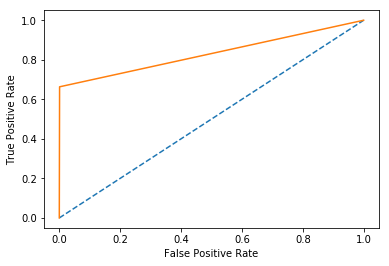

In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_y, predictions)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
name = 'ROC curve for Anomaly Detection'

# CLASSIFICATION MODELS

In [11]:
df = pd.read_csv('credit_card_4_5.csv')
df = df.sample(frac=1)
df = df.drop(df.columns[0], axis=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1][:393]
non_fraud_df = df.loc[df['Class'] == 0][:393]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
# new_df.to_csv('new_data_4_5_shuffled.csv')
new_df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
139151,-0.019385,2.349637,0.883691,-0.736146,0.362030,0.571842,-0.779511,-0.097417,-0.118177,-0.022538,...,-0.157180,-0.329685,-0.876800,0.009588,0.180015,0.164188,-0.568062,0.025457,0.053713,0
30314,-0.573619,-0.201090,-2.044489,3.368306,-3.937111,5.623120,-3.079232,-1.253474,-5.778880,1.707428,...,1.112028,1.483594,0.834311,-0.148486,0.001669,-0.038996,0.389526,1.300236,0.549940,1
128476,-0.070091,0.531023,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,...,-0.718706,0.550541,-0.067870,-1.114692,0.269069,-0.020572,-0.963489,-0.918888,0.001454,1
150663,0.107722,0.782560,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,...,-0.646818,2.541637,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,1
44270,-0.503081,-0.293460,-20.906908,9.843153,-19.947726,6.155789,-15.142013,-2.239566,-21.234463,1.151795,...,0.396655,-1.977196,0.652932,-0.519777,0.541702,-0.053861,0.112671,-3.765371,-1.071238,1


In [14]:
# Undersampling before cross validating (prone to overfit)
y_train = new_df['Class']
X_train = new_df.drop('Class', axis=1)

dftest = pd.read_csv('credit_card_1_5.csv')
dftest = dftest.drop(df.columns[0], axis=1)

y_test = dftest['Class']
X_test = dftest.drop('Class',axis=1)
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [32]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
# from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss
# from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

Classification Report of  LogisiticRegression :
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56861
           1       0.08      0.87      0.14        98

    accuracy                           0.98     56959
   macro avg       0.54      0.92      0.57     56959
weighted avg       1.00      0.98      0.99     56959

Classifiers:  LogisticRegression Has a training score of 92.0 % accuracy score
Classification Report of  KNearest :
               precision    recall  f1-score   support

           0       1.00      0.63      0.77     56861
           1       0.00      0.64      0.01        98

    accuracy                           0.63     56959
   macro avg       0.50      0.63      0.39     56959
weighted avg       1.00      0.63      0.77     56959

Classifiers:  KNeighborsClassifier Has a training score of 63.0 % accuracy score
Classification Report of  Support Vector Classifier :
               precision    recall  f1-score 

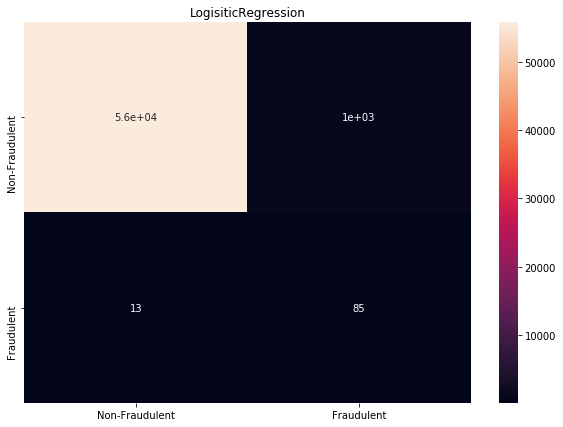

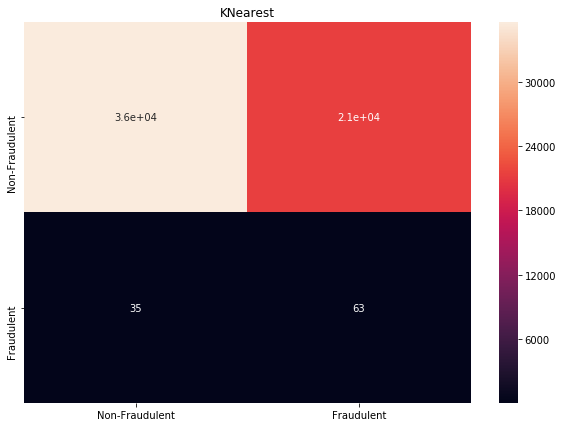

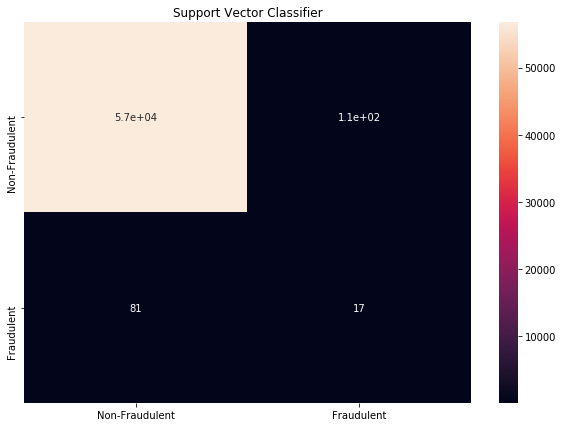

In [33]:

# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC()
}
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
#Let's see how our model performed
from sklearn.metrics import classification_report
classrep = []
confusionmatrices = {}
predicts = {}
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print('Classification Report of ',key,':\n',classification_report(y_test, predictions))
    predicts[key] = predictions
    classrep.append(classification_report(y_test, predictions));
    confusionmatrices[key] = confusion_matrix(y_test,predictions);
    df_cm = pd.DataFrame(confusion_matrix(y_test,predictions), index = [i for i in ['Non-Fraudulent','Fraudulent']],
                  columns = [i for i in ['Non-Fraudulent','Fraudulent']])
    plt.figure(figsize = (10,7))
    plt.title(key)
    sn.heatmap(df_cm, annot=True)
    name = key + 'Confusion Matrix'
    plt.savefig(name)
#     print('The cofusion matrix for',key,':\n',confusion_matrix(y_test,predictions),'\n')
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

In [34]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from '/Users/nimishagarwal/anaconda3/envs/Data-Science-with-Python/lib/python3.6/site-packages/matplotlib/pyplot.py'>

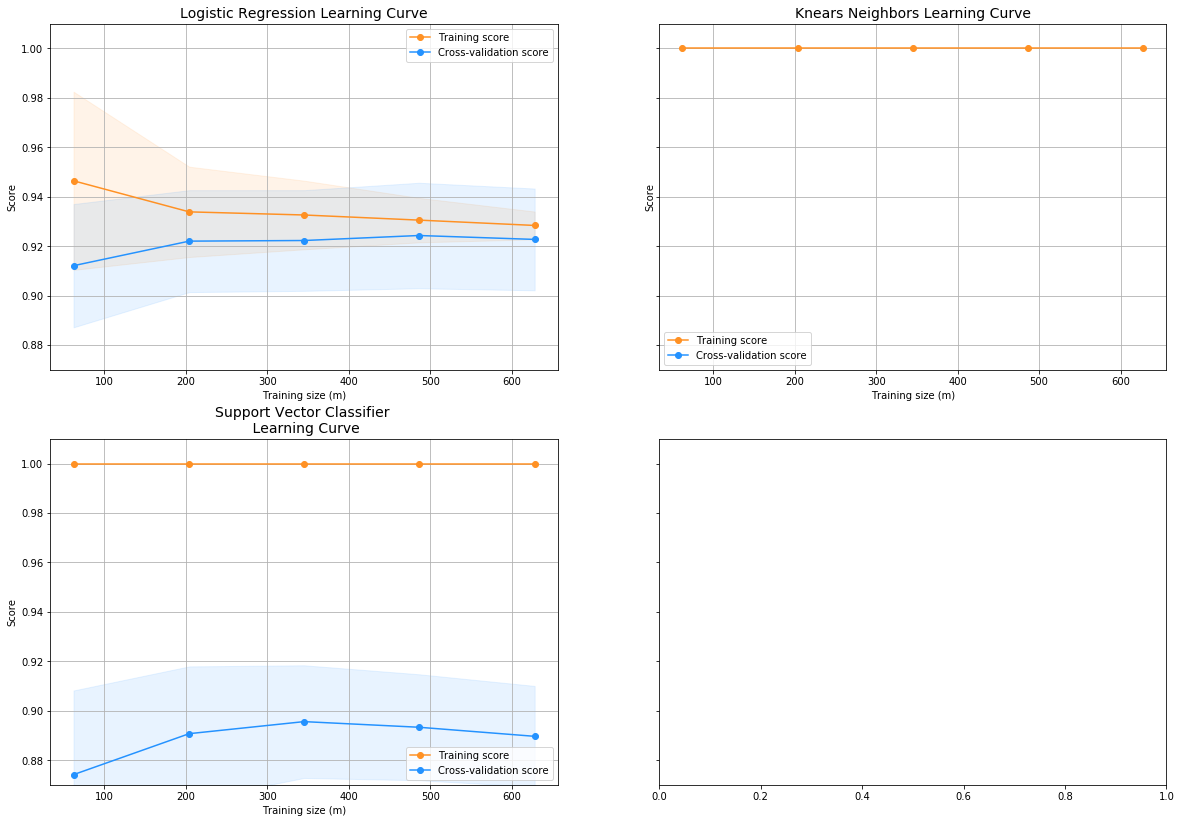

In [35]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(LogisticRegression(),SVC(), DecisionTreeClassifier(),  KNeighborsClassifier(),X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

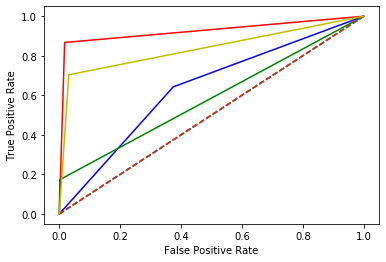

In [39]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
colour={"LogisiticRegression": 'r-',
    "KNearest": 'b-',
    "Support Vector Classifier": 'g-',
       "isolation forest" : 'y-'}
predicts["isolation forest"] = y_pred_iso
classifiers["isolation forest"] = clf
for key, classifier in classifiers.items():
    fpr, tpr, thresholds = roc_curve(y_test, predicts[key])
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr,colour[key],label=key)
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    name = 'ROC curve for '+key
    
#     pyplot.title(name)

Red: Logistic Regression

Yellow: Isolation Forest

Blue: KNN

Green: SVC

# Conclusion:
    

Among all algorithms, **Logistic Regression** has the **highest percentage of correctly identified transactions**, while **Gaussian Anomaly Detection** had the **highest accuracy**.

**Logistic Regression** classified 85 out of 98 fraudulent transactions correctly, with **92%** accuracy overall.

Only **5%** of the **fraud transactions** were missed by Logistic Regression.

Number of non-fraudulent transactions classified as non-fraudulent: approx 1000.

Total Number of Transactions needed to be verified: approx 1100 in 10 hours

Assuming that one employee would need 10 minutes for manually verifying whether a transaction is actually fraud or not, he/she can verify 60 transactions in 10 hours. 

Practically, the bank needs to have a team of 40 dedicated individuals, who would work in 2 shifts, if Logistic Regression is used.

If **Gaussian Anomaly Detection** is used, only 120 transactions need to be manually verified in 10 hours, with **99.84% accuracy** which would need a team of 4 dedicated individuals only.

But **33%** of the **fraud transactions** were missed by this method.